# 1. Entender el problema y definir el objetivo

o	person_age: Edad del solicitante del préstamo.

o	person_income: Ingreso anual del solicitante.

o	person_home_ownership: Tipo de propiedad de vivienda (ej. alquilada, propia, hipotecada).

o	person_emp_length: Tiempo de empleo del solicitante en años.

o	loan_intent: Propósito del préstamo (ej. educación, negocio, automóvil).

o	loan_grade: Calificación del préstamo según su riesgo.

o	loan_amnt: Monto del préstamo solicitado.

o	loan_int_rate: Tasa de interés aplicada al préstamo.

o	loan_status: Estado del préstamo (0 = no incumplimiento, 1 = incumplimiento).

o	loan_percent_income: Porcentaje del ingreso anual destinado al pago del préstamo.

o	cb_person_default_on_file: Historial de incumplimiento de pagos (sí o no). Indica si el solicitante tiene un historial de incumplimiento de pagos (sí o no),

o	cb_person_cred_hist_length: Duración del historial crediticio del solicitante en años. Duración del historial crediticio en años, mayor tiempo suele asociarse con menor riesgo.


Algunos de los objetivos que podemos plantear son:

- Objetivo: Predecir la probabilidad de incumplimiento del préstamo (loan_status) Clasificacion

- Objetivo: Predecir la tasa de interés (loan_int_rate) basada en las características del cliente y el préstamo. regresion 

- Objetivo: agrupar a los solicitantes según características como ingresos, historial crediticio y porcentaje de ingresos destinado al préstamo. k means clustering






# 2. Cargar librerías y el dataset

In [1]:
#Cargar librerias base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#nombramos a la base de datos y le pasamos la ruta de acceso
df_original = pd.read_csv("credit_risk_dataset.csv")
df_original

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
print(type(df_original))

<class 'pandas.core.frame.DataFrame'>


# 3. Explorar el dataset:

### 3.1.- Inspeccion de datos

Para esta parte es importante disponer de un experto en el tema o hacer una investigacion exhaustiva debido a que se obtendrán conclusiones de cierta informacion de los datos y no deben ser erradas

In [13]:
df_original

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
#tamaño del df
df_original.shape

(32581, 12)

In [7]:
#columnas
df_original.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [14]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [15]:
#n filas aleatorias
df_original.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
3239,23,30000,MORTGAGE,6.0,HOMEIMPROVEMENT,A,6725,6.99,1,0.22,N,3
29218,36,15000,OWN,2.0,PERSONAL,C,5000,13.92,1,0.33,Y,15
10603,22,69000,MORTGAGE,4.0,EDUCATION,A,1000,7.40,0,0.01,N,2
9369,23,61440,OWN,6.0,PERSONAL,B,2500,NaN,0,0.04,N,3
13880,24,97000,MORTGAGE,2.0,HOMEIMPROVEMENT,C,12000,10.28,0,0.12,N,2
13890,23,97781,MORTGAGE,7.0,MEDICAL,A,5575,6.54,0,0.06,N,3
18423,28,84996,RENT,8.0,HOMEIMPROVEMENT,C,20000,13.92,0,0.24,N,9
2757,23,34000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,19000,11.48,0,0.56,N,4
30814,44,70000,RENT,4.0,EDUCATION,C,9500,14.22,0,0.14,N,14
1740,22,26500,RENT,3.0,DEBTCONSOLIDATION,A,1900,7.29,1,0.07,N,3


### 3.2.- Deteccion de valores nulos, duplicados y atipicos

In [8]:
#¿hay data nula?
df_original.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Solamente dos columnas tienen datos flatantes:

o	loan_int_rate: Tasa de interés aplicada al préstamo.

o	person_emp_length: Tiempo de empleo del solicitante en años.

In [19]:
#examinar duplicados
num_duplicados = df_original.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 165


Es importante deshacernos de los elementos duplicados ya que introducen sesgo al modelo de machinear aunque aquí el número de filas duplicadas es muy poco respecto a la cantidad total de datos

In [13]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


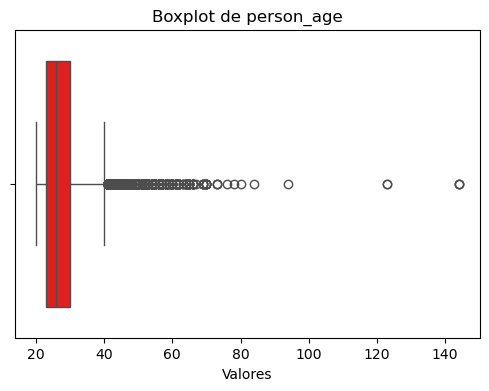

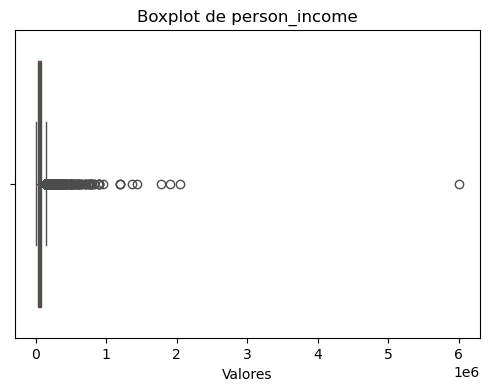

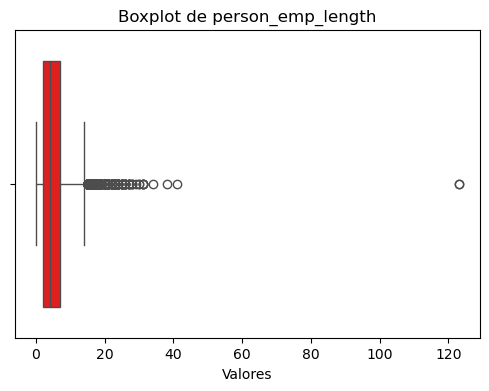

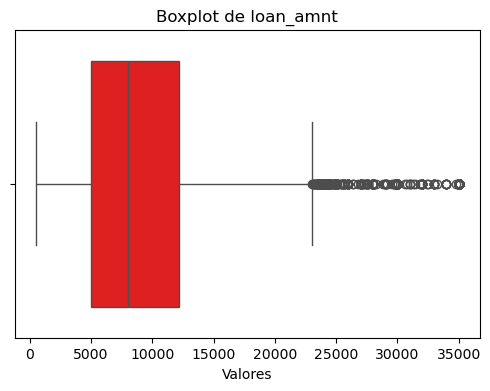

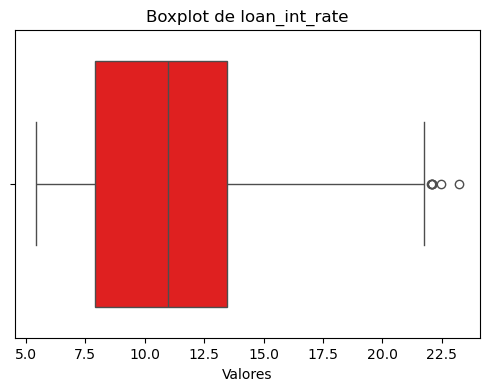

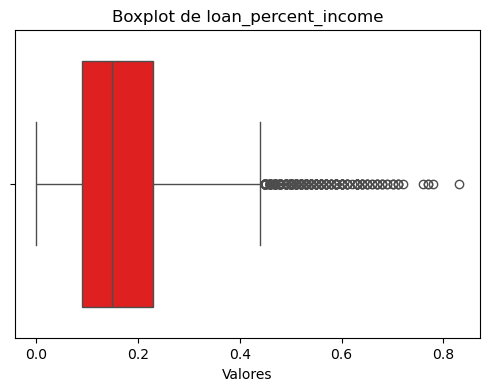

In [3]:
#para ver si hay valores atipicos (darnos una idea)
columnas = ["person_age", "person_income", "person_emp_length", "loan_amnt","loan_int_rate", "loan_percent_income"] 
# Crear gráficos
for col in columnas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_original[col], color="red")
    plt.title(f"Boxplot de {col}")
    plt.xlabel("Valores")
    plt.show()


In [24]:
# Investigamos el porcentaje de valores atípicos en cada columna numérica
import numpy as np

columnas = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income"]

total_datos = 32581

for col in columnas:
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir límites para valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Contar valores atípicos
    outliers = df_original[(df_original[col] < lower_bound) | (df_original[col] > upper_bound)][col]
    num_outliers = outliers.count()
    porcentaje_outliers = (num_outliers / total_datos) * 100
    
    print(f"Columna: {col}, Número de valores atípicos: {num_outliers}, Porcentaje: {porcentaje_outliers:.2f}%")


Columna: person_age, Número de valores atípicos: 1494, Porcentaje: 4.59%
Columna: person_income, Número de valores atípicos: 1484, Porcentaje: 4.55%
Columna: person_emp_length, Número de valores atípicos: 853, Porcentaje: 2.62%
Columna: loan_amnt, Número de valores atípicos: 1689, Porcentaje: 5.18%
Columna: loan_int_rate, Número de valores atípicos: 6, Porcentaje: 0.02%
Columna: loan_percent_income, Número de valores atípicos: 651, Porcentaje: 2.00%


### 3.3.- Data categorica

In [17]:
#conteo de categorias
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [26]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [27]:
# Obtener las categorías (valores únicos) de cada columna
# Seleccionar solo las columnas columna1 y columna2
columnas_seleccionadas = df_original[['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']]

# Obtener las categorías (valores únicos) de estas columnas
for col in columnas_seleccionadas.columns:
    print(f"Categorías en {col}: {columnas_seleccionadas[col].unique()}")


Categorías en person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Categorías en loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Categorías en loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
Categorías en cb_person_default_on_file: ['Y' 'N']


### 3.4.- analisis de datos numericos

In [4]:
df_original["person_age"].unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67], dtype=int64)

In [18]:
#Estadistica descritiva univariada para el dataset
df_original.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Ahora investiguemos qué tan representativa es la media (con el coeficiente de variacion) por ejemplo de la edad de personas

In [10]:
# Calcular el coeficiente de variación para todas las columnas numéricas
cv_dict = {}

for column in df_original.select_dtypes(include=['float64', 'int64']).columns:
    mean = df_original[column].mean()
    std = df_original[column].std()
    cv = std / mean
    cv_dict[column] = cv

# Imprimir resultados
for column, cv in cv_dict.items():
    print(f"Coeficiente de variación para {column}: {cv:.4f}")

Coeficiente de variación para person_age: 0.2289
Coeficiente de variación para person_income: 0.9381
Coeficiente de variación para person_emp_length: 0.8649
Coeficiente de variación para loan_amnt: 0.6593
Coeficiente de variación para loan_int_rate: 0.2943
Coeficiente de variación para loan_status: 1.8931
Coeficiente de variación para loan_percent_income: 0.6274
Coeficiente de variación para cb_person_cred_hist_length: 0.6986


Vemos que casi todas las medias de las columnas son representativas de ellas mismas

Vemos que hay que normalizar las escalas por los intervalos diferentes en cuanto a su rango

Ahora vamos a darnos una idea sobre la distribución de las variables pero el siguiente gráfico sólo es para las variables aleatorias continuas ya que nos dará de forma visual la gráfica de la función de densidad, En caso de que alguna variable sea discreta entonces el gráfico estará incorrecto y hay que darse el tiempo de investigar el tipo de variable de cada columna para poder investigar a nivel exacto la distribución

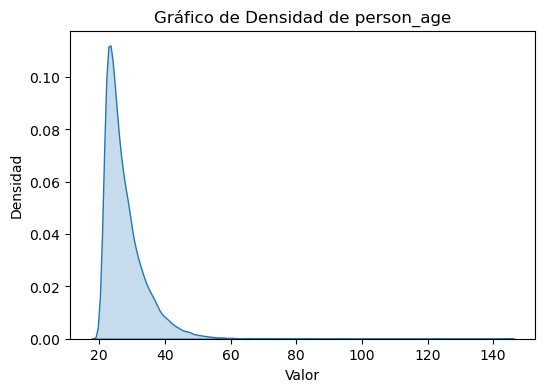

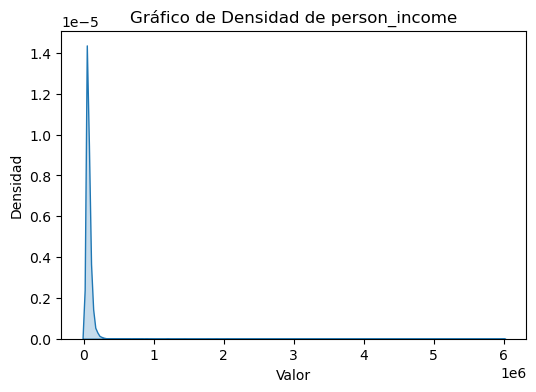

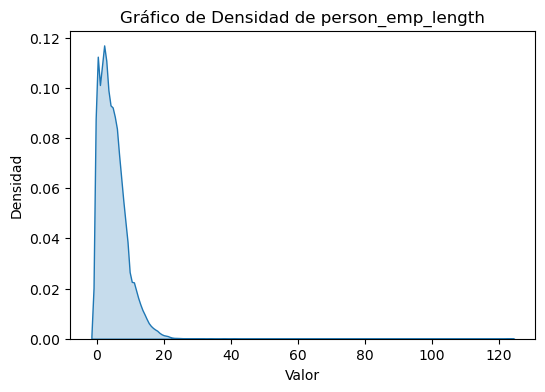

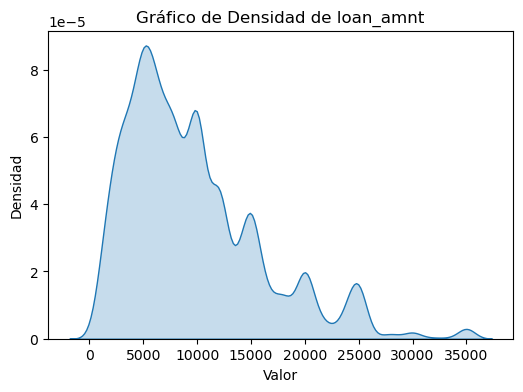

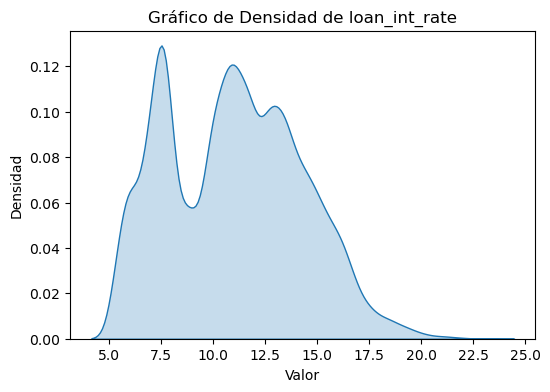

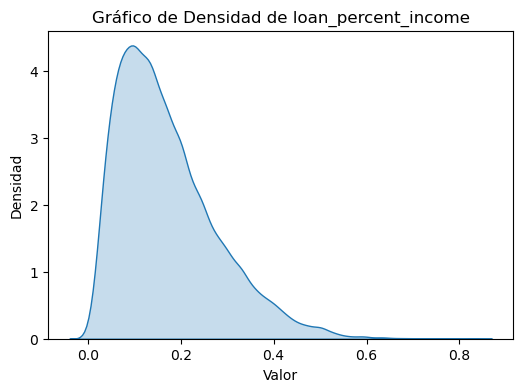

In [20]:
# Lista de columnas a graficar
columns = ["person_age", "person_income", "person_emp_length", "loan_amnt","loan_int_rate", "loan_percent_income"] 

# Crear gráficos
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df_original[col], fill=True)
    plt.xlabel("Valor")
    plt.ylabel("Densidad")
    plt.title(f"Gráfico de Densidad de {col}")
    plt.show()

### 3.5.- Correlaciones y covarianza

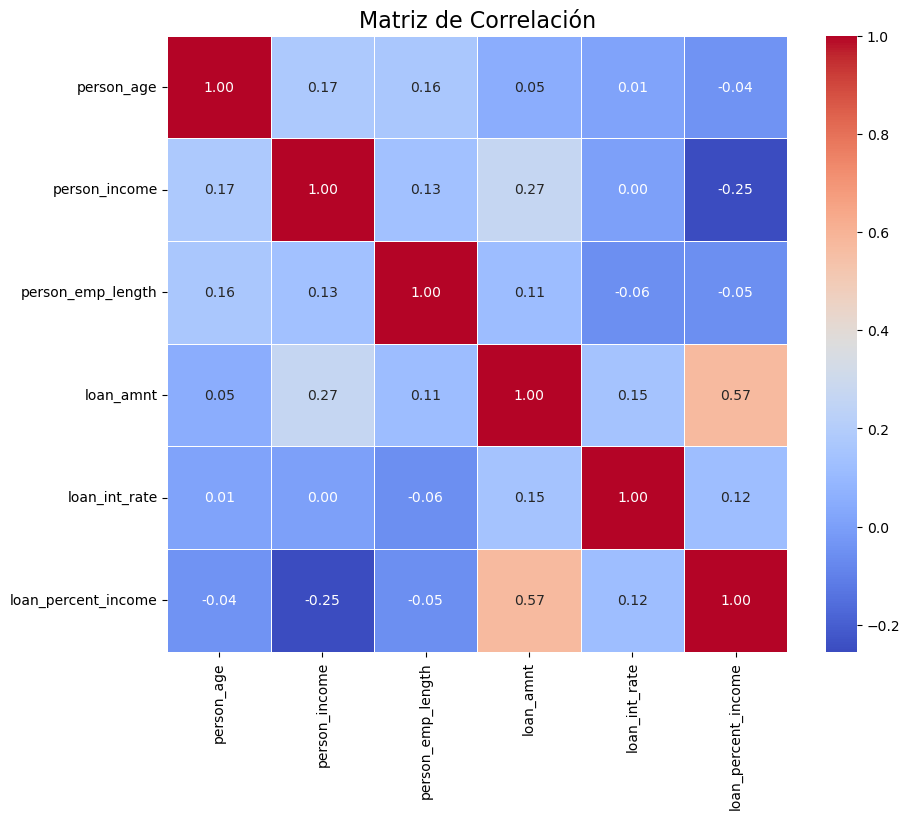

In [15]:
# Ahora investigamos la correlación entre las variables numéricas no binarias
# Seleccionar las columnas de interés
columnas = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income"]

# Calcular la matriz de correlación
matriz_correlacion = df_original[columnas].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlación', fontsize=16)
plt.show()


# 4. Preparar los datos (impiar, organizar y hacer visualizaciones)

##### CARACTERISTICAS DEL DATASET

- data nula en person_emp_length y loan_int_rate
- valores atipicos en varias columnas
- hay data categorica
- el rango de las variables es diferente
- la distribucion de las variables no es normal

### Que tipo de limpieza se debe hacer?

Dado que nuestro objetivo es  Predecir la tasa de interés (loan_int_rate) basada en las características del cliente y el préstamo, necesitamos tener la data limpia para los modelos que se implementarán.
Nesecitamos hacer la siguiente limpieza o considerarlas dadas las caracteristicas del dataset:

- 1 Estudiar la data nula e imputarla
- 2 Estudiar los valores atipicos en las 
- 3 Transformacion de datos categoricos con variables dummy
- 4 Considerar escalar variables
- 5 Ver correlaciones y evitar la multicolinealidad

In [4]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
#mover variable objetivo al final
def move_column_to_end(df_original, column_name):
    col = df_original.pop(column_name)
    df_original[column_name] = col
    return df_original

df = move_column_to_end(df_original, 'loan_int_rate')

In [17]:
df_original

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate
0,22,59000,RENT,123.0,PERSONAL,D,35000,1,0.59,Y,3,16.02
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N,2,11.14
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3,12.87
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2,15.23
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4,14.27
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,0.11,N,30,13.16
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0,0.15,N,19,7.49
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1,0.46,N,28,10.99
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0,0.10,N,26,11.48


## 4.1.-Imputacion de data nula 

In [9]:
df_original.shape

(32581, 12)

In [8]:
df_original.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
#Estudiamos la data nula en bmi, ¿que metodo usamos para rellenar, la quitamos?
#Calculamos el porcentaje de datos que faltan en bmi
print("el tamaño es: ", df_original.shape)
print("el total de datos son 32581 y en person_emp_length flatan 895, por lo tanto, el porcentaje de valores nulos en person_emp_length es: " , 895*100/32581, "%")
print("el total de datos son 32581 y en loan_int_rate flatan 3116, por lo tanto, el porcentaje de valores nulos en loan_int_rate es: " , 3116*100/32581, "%")

el tamaño es:  (32581, 12)
el total de datos son 32581 y en person_emp_length flatan 895, por lo tanto, el porcentaje de valores nulos en person_emp_length es:  2.7469997851508547 %
el total de datos son 32581 y en loan_int_rate flatan 3116, por lo tanto, el porcentaje de valores nulos en loan_int_rate es:  9.563856235229121 %


Estos histogramas nos dan una idea de cómo está distribuido cada variable pero tenemos que investigar qué tipo de variable es cada una para poder representarla con su funcion de masa o de densidad

Analizaremos la distribución de las dos variables a las cuales les vamos a imputar valores y vamos a verificar que después de la imputación no haya cambiado su distribución para no introducir sesgo en los datos. Para ello primero tenemos que entender que significa cada variable y por lo tanto qué datos contiene o qué tipo de datos contiene


o	loan_int_rate: Tasa de interés aplicada al préstamo.


o	person_emp_length: Tiempo de empleo del solicitante en años.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset (ajusta el nombre del archivo)
df = pd.read_csv("tu_dataset.csv")

# Especificar la variable que deseas visualizar
variable = "nombre_de_la_columna"

# Graficar la distribución
plt.figure(figsize=(8, 5))
sns.histplot(df[variable], kde=True, bins=30)
plt.xlabel(variable)
plt.ylabel("Frecuencia")
plt.title(f"Distribución de {variable}")
plt.show()


In [6]:
#agregamos la mediana en los valores nulos de ambas columnas
df_original[["loan_int_rate", "person_emp_length"]] = df_original[["loan_int_rate", "person_emp_length"]].apply(lambda x: x.fillna(x.median()))


In [19]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df_original.isna().sum() #ya no hay data nula

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_int_rate                 0
dtype: int64

### 2. Estudiar los valores atipicos 


In [30]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate
0,22,59000,RENT,123.0,PERSONAL,D,35000,1,0.59,Y,3,16.02
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N,2,11.14
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3,12.87
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2,15.23
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4,14.27


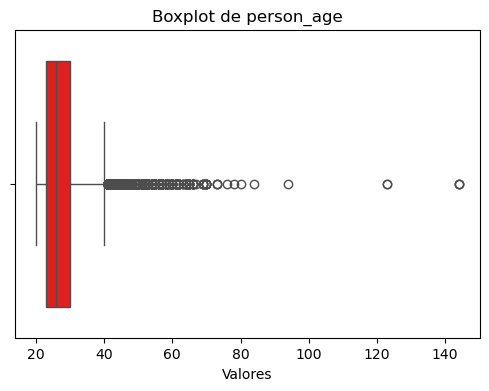

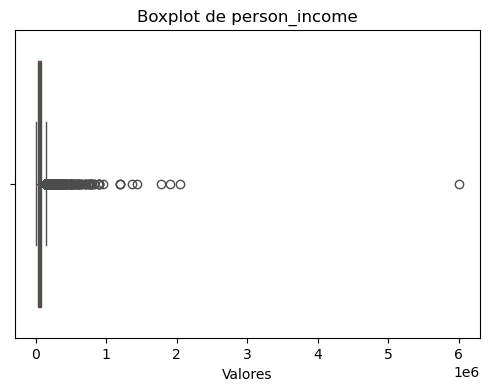

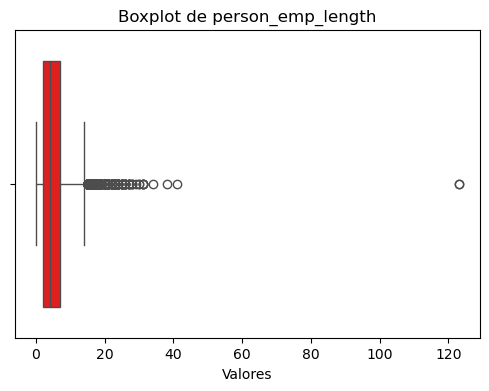

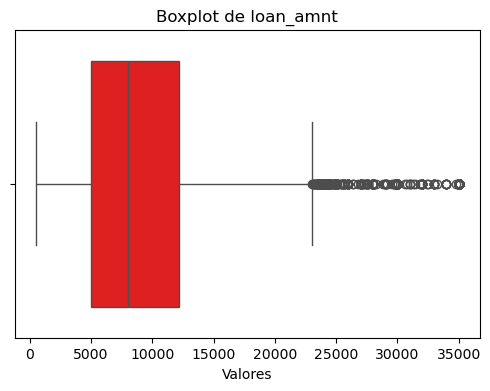

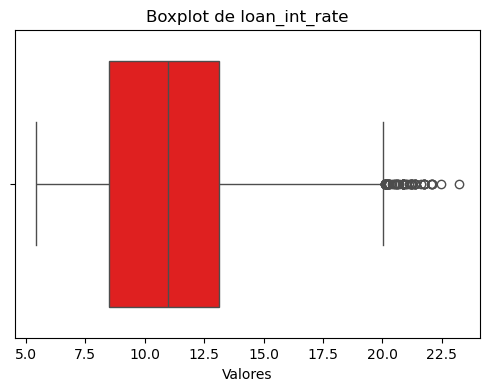

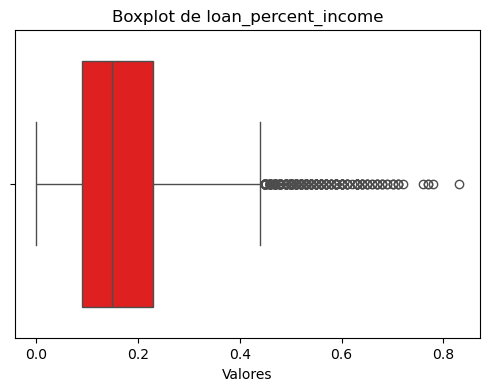

In [21]:
#para ver si hay valores atipicos 
columnas = ["person_age", "person_income", "person_emp_length", "loan_amnt","loan_int_rate", "loan_percent_income"] 
# Crear gráficos
for col in columnas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_original[col], color="red")
    plt.title(f"Boxplot de {col}")
    plt.xlabel("Valores")
    plt.show()

In [31]:
# Lista de columnas a evaluar
columnas = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income"]

# Iterar sobre cada columna para calcular el porcentaje de valores atípicos
for col in columnas:
    # Cálculo del IQR
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1  # Rango intercuartílico (IQR)

    # Definir límites para valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contabilizar los valores atípicos
    outliers = df_original[(df_original[col] < lower_bound) | (df_original[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    total_values = df_original[col].shape[0]
    percent_outliers = (num_outliers / total_values) * 100

    # Imprimir resultados
    print(f"Columna: {col}")
    print(f"Número de valores atípicos: {num_outliers}")
    print(f"Porcentaje de valores atípicos: {percent_outliers:.2f}%\n")


Columna: person_age
Número de valores atípicos: 1494
Porcentaje de valores atípicos: 4.59%

Columna: person_income
Número de valores atípicos: 1484
Porcentaje de valores atípicos: 4.55%

Columna: person_emp_length
Número de valores atípicos: 853
Porcentaje de valores atípicos: 2.62%

Columna: loan_amnt
Número de valores atípicos: 1689
Porcentaje de valores atípicos: 5.18%

Columna: loan_int_rate
Número de valores atípicos: 70
Porcentaje de valores atípicos: 0.21%

Columna: loan_percent_income
Número de valores atípicos: 651
Porcentaje de valores atípicos: 2.00%



como la dsitribucion de ninguna columna es normal, usaremos la mediana para reemplazar los valores atipicos

si bien, el porcentaje de atipicos en cada columna no es importante, para la regresion lineal si lo es ya que esta basada en distancias

In [32]:
#imputamos la mediana en las columnas con valores atipicos


# Lista de columnas a evaluar
columnas = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income"]

# Iterar sobre cada columna para reemplazar valores atípicos por la mediana
for col in columnas:
    # Calcular Q1 (percentil 25) y Q3 (percentil 75)
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Calcular la mediana
    mediana = df_original[col].median()

    # Reemplazar valores atípicos por la mediana
    df_original[col] = np.where(
        (df_original[col] < limite_inferior) | 
        (df_original[col] > limite_superior), 
        mediana, 
        df_original[col]
    )

# Mostrar el DataFrame actualizado
print(df_original)


       person_age  person_income person_home_ownership  person_emp_length  \
0            22.0        59000.0                  RENT                4.0   
1            21.0         9600.0                   OWN                5.0   
2            25.0         9600.0              MORTGAGE                1.0   
3            23.0        65500.0                  RENT                4.0   
4            24.0        54400.0                  RENT                8.0   
...           ...            ...                   ...                ...   
32576        26.0        53000.0              MORTGAGE                1.0   
32577        26.0       120000.0              MORTGAGE                4.0   
32578        26.0        76000.0                  RENT                3.0   
32579        26.0        55000.0              MORTGAGE                5.0   
32580        26.0        42000.0                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_status  \
0             

In [33]:
#comprobamos que ya se hayan reducido los atipicos
# Lista de columnas a evaluar
columnas = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income"]

# Iterar sobre cada columna para calcular el porcentaje de valores atípicos
for col in columnas:
    # Cálculo del IQR
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1  # Rango intercuartílico (IQR)

    # Definir límites para valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contabilizar los valores atípicos
    outliers = df_original[(df_original[col] < lower_bound) | (df_original[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    total_values = df_original[col].shape[0]
    percent_outliers = (num_outliers / total_values) * 100

    # Imprimir resultados
    print(f"Columna: {col}")
    print(f"Número de valores atípicos: {num_outliers}")
    print(f"Porcentaje de valores atípicos: {percent_outliers:.2f}%\n")

Columna: person_age
Número de valores atípicos: 573
Porcentaje de valores atípicos: 1.76%

Columna: person_income
Número de valores atípicos: 587
Porcentaje de valores atípicos: 1.80%

Columna: person_emp_length
Número de valores atípicos: 761
Porcentaje de valores atípicos: 2.34%

Columna: loan_amnt
Número de valores atípicos: 60
Porcentaje de valores atípicos: 0.18%

Columna: loan_int_rate
Número de valores atípicos: 0
Porcentaje de valores atípicos: 0.00%

Columna: loan_percent_income
Número de valores atípicos: 350
Porcentaje de valores atípicos: 1.07%



### 3. Ahora codificamos las variables dummy

In [34]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate
0,22.0,59000.0,RENT,4.0,PERSONAL,D,8000.0,1,0.15,Y,3,16.02
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,0,0.10,N,2,11.14
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,1,0.15,N,3,12.87
3,23.0,65500.0,RENT,4.0,MEDICAL,C,8000.0,1,0.15,N,2,15.23
4,24.0,54400.0,RENT,8.0,MEDICAL,C,8000.0,1,0.15,Y,4,14.27


las variables que deben ser codificadas son:

- person_home_ownership
  
- loan_intent
  
- loan_grade

- cb_person_default_on_file



In [37]:
lista = ["person_home_ownership","loan_intent","loan_grade","cb_person_default_on_file"]
for i in lista:
    num_categorias = df_original[i].nunique()
    print(f'Este es el numero de categorias: {num_categorias}, en la columna {i}') 

Este es el numero de categorias: 4, en la columna person_home_ownership
Este es el numero de categorias: 6, en la columna loan_intent
Este es el numero de categorias: 7, en la columna loan_grade
Este es el numero de categorias: 2, en la columna cb_person_default_on_file


Como las variables dummy generan k-1 columnas o variables nuevas para k el numero de categorias en cada columna:

- person_home_ownership generara 3 columnas nuevas

- loan_intent 5

- loan_grade 6

- cb_person_default_on_file 1


15 nuevas dummy + las que ya estaban 8






In [18]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


1

In [38]:
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate
0,22.0,59000.0,RENT,4.0,PERSONAL,D,8000.0,1,0.15,Y,3,16.02
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,0,0.10,N,2,11.14
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,1,0.15,N,3,12.87
3,23.0,65500.0,RENT,4.0,MEDICAL,C,8000.0,1,0.15,N,2,15.23
4,24.0,54400.0,RENT,8.0,MEDICAL,C,8000.0,1,0.15,Y,4,14.27


In [8]:
lista = ["person_home_ownership","loan_intent","loan_grade","cb_person_default_on_file"]
df_dummies = pd.get_dummies(df_original[lista], drop_first=True, dtype=int)


In [40]:
print(df_dummies.head()) 

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                            0                          0   
1                            0                          1   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   person_home_ownership_RENT  loan_intent_EDUCATION  \
0                           1                      0   
1                           0                      1   
2                           0                      0   
3                           1                      0   
4                           1                      0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                            0                    0                     1   
1                            0                    0                     0   
2                            0                    1              

In [9]:
# Unir las columnas dummy con el DataFrame original
df_final = pd.concat([df_original, df_dummies], axis=1)

# Eliminar las columnas categóricas originales si ya no las necesitas
df_final = df_final.drop(["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"], axis=1)

In [10]:
df_final = pd.DataFrame(df_final)

In [10]:
df_final.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,loan_int_rate,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,1,0.59,3,16.02,0,0,...,0,1,0,0,0,1,0,0,0,1
1,21,9600,5.0,1000,0,0.10,2,11.14,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,1,0.57,3,12.87,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,1,0.53,2,15.23,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,1,0.55,4,14.27,0,0,...,1,0,0,0,1,0,0,0,0,1


In [11]:
#mover variable objetivo al final
def move_column_to_end(df_final, column_name):
    col = df_final.pop(column_name)
    df_final[column_name] = col
    return df_final

df = move_column_to_end(df_final, 'loan_int_rate')

In [46]:
df_final.shape

(32581, 23)

In [15]:
type(df_final)

pandas.core.frame.DataFrame

In [47]:
# Verificar los tipos de datos de cada columna en df_final
print(df_final.dtypes)

person_age                     float64
person_income                  float64
person_emp_length              float64
loan_amnt                      float64
loan_status                      int64
loan_percent_income            float64
cb_person_cred_hist_length       int64
person_home_ownership_OTHER      int32
person_home_ownership_OWN        int32
person_home_ownership_RENT       int32
loan_intent_EDUCATION            int32
loan_intent_HOMEIMPROVEMENT      int32
loan_intent_MEDICAL              int32
loan_intent_PERSONAL             int32
loan_intent_VENTURE              int32
loan_grade_B                     int32
loan_grade_C                     int32
loan_grade_D                     int32
loan_grade_E                     int32
loan_grade_F                     int32
loan_grade_G                     int32
cb_person_default_on_file_Y      int32
loan_int_rate                  float64
dtype: object


In [48]:
print(type(df_final))

<class 'pandas.core.frame.DataFrame'>


Efectivamente son 17 columnas

Por ultimo, consideramos la escalabilidad

In [49]:
df_final.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,loan_int_rate
0,22.0,59000.0,4.0,8000.0,1,0.15,3,0,0,1,...,1,0,0,0,1,0,0,0,1,16.02
1,21.0,9600.0,5.0,1000.0,0,0.10,2,0,1,0,...,0,0,1,0,0,0,0,0,0,11.14
2,25.0,9600.0,1.0,5500.0,1,0.15,3,0,0,0,...,0,0,0,1,0,0,0,0,0,12.87
3,23.0,65500.0,4.0,8000.0,1,0.15,2,0,0,1,...,0,0,0,1,0,0,0,0,0,15.23
4,24.0,54400.0,8.0,8000.0,1,0.15,4,0,0,1,...,0,0,0,1,0,0,0,0,1,14.27


In [12]:
#observamos los rangos en los uqe se encuentran las variables
df_final.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,loan_int_rate
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.00000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,0.218164,0.170203,5.804211,0.003284,0.079310,0.504773,...,0.169455,0.175532,0.32077,0.198214,0.111292,0.029588,0.007397,0.001964,0.176330,11.009620
std,6.348078,6.198312e+04,4.087372,6322.086646,0.413006,0.106782,4.055001,0.057214,0.270226,0.499985,...,0.375159,0.380427,0.46678,0.398660,0.314498,0.169450,0.085688,0.044278,0.381106,3.081611
min,20.000000,4.000000e+03,0.000000,500.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.420000
25%,23.000000,3.850000e+04,2.000000,5000.000000,0.000000,0.090000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.490000
50%,26.000000,5.500000e+04,4.000000,8000.000000,0.000000,0.150000,4.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.990000
75%,30.000000,7.920000e+04,7.000000,12200.000000,0.000000,0.230000,8.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.110000
max,144.000000,6.000000e+06,123.000000,35000.000000,1.000000,0.830000,30.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.220000


Ya que las ecalas de las variables son diferentes y el modelo de regresion logistica se basa en distancias, vamos a normalizar

# 5.- Visualizaciones

Esta parte se omite poruqe el interes es implementar mododelos de aprendizaje automatico

# 6.- Modelado y evaluacion inicial

¿que modelos pueden ayudarnos a conseguir nuestro objetivo?

Tipo de dato que queremos predecir: Numerico continuo que representa la tasa de interes aplicada al prestamo segun las caracteristicas del solicitante

Tipo de dato de entrada: variable multivariante numerica 

Utilizaremos:

Regresión lineal

SVR



**Regresión Lineal 📈**  

- Es un modelo estadístico que asume una relación lineal entre una variable dependiente y una o más variables independientes.
  
- Su interpretación es sencilla: cada coeficiente representa cuánto cambia la variable objetivo por unidad de cambio en la variable explicativa.
  
- Funciona bien cuando los datos tienen una tendencia lineal clara.
  
- Es sensible a valores atípicos y no se desempeña bien con relaciones no lineales sin transformaciones adecuadas.  

**Support Vector Regression (SVR) ⚖️**  

- Es una técnica basada en Support Vector Machines (SVM) que busca encontrar una función que prediga valores con un margen de tolerancia.
  
- Puede modelar relaciones no lineales utilizando distintos núcleos (kernel trick).
  
- Robusto frente a valores atípicos y eficiente en espacios de alta dimensión.
  
- Puede ser más complejo y costoso computacionalmente en comparación con la regresión lineal.




## 6.0.- Preprocesamos los datos para los modelos

In [16]:
df_final.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.0,1.0,0.801265,0.301260,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,0.679023,0.203895,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,0.234512,0.254296,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.597168,0.0,0.0,0.536008,0.276060,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.963379,1.0,0.0,0.549349,0.156930,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [12]:
#mover variable objetivo al final
def move_column_to_end(df_final, column_name):
    col = df_final.pop(column_name)
    df_final[column_name] = col
    return df_final

df = move_column_to_end(df_final, 'stroke')



In [13]:
df_final.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,loan_int_rate
0,22,59000,123.0,35000,1,0.59,3,0,0,1,...,1,0,0,0,1,0,0,0,1,16.02
1,21,9600,5.0,1000,0,0.10,2,0,1,0,...,0,0,1,0,0,0,0,0,0,11.14
2,25,9600,1.0,5500,1,0.57,3,0,0,0,...,0,0,0,1,0,0,0,0,0,12.87
3,23,65500,4.0,35000,1,0.53,2,0,0,1,...,0,0,0,1,0,0,0,0,0,15.23
4,24,54400,8.0,35000,1,0.55,4,0,0,1,...,0,0,0,1,0,0,0,0,1,14.27


In [13]:
df_final.shape

(5110, 17)

In [14]:
#Definimos las variables
X = df_final.iloc[:, :-1] 
y = df_final.iloc[:, -1]

In [15]:
X

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,1,0.59,3,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,21,9600,5.0,1000,0,0.10,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,1,0.57,3,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,1,0.53,2,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,1,0.55,4,0,0,1,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,0,0.11,30,0,0,0,...,0,1,0,0,1,0,0,0,0,0
32577,54,120000,4.0,17625,0,0.15,19,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32578,65,76000,3.0,35000,1,0.46,28,0,0,1,...,0,0,0,1,0,0,0,0,0,0
32579,56,150000,5.0,15000,0,0.10,26,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [16]:
X.shape

(32581, 22)

In [17]:
y

0        16.02
1        11.14
2        12.87
3        15.23
4        14.27
         ...  
32576    13.16
32577     7.49
32578    10.99
32579    11.48
32580     9.99
Name: loan_int_rate, Length: 32581, dtype: float64

In [18]:
y.shape

(32581,)

In [19]:
X.values

array([[2.20e+01, 5.90e+04, 1.23e+02, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [2.10e+01, 9.60e+03, 5.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.50e+01, 9.60e+03, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [6.50e+01, 7.60e+04, 3.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.60e+01, 1.50e+05, 5.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [6.60e+01, 4.20e+04, 2.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [20]:
y.values

array([16.02, 11.14, 12.87, ..., 10.99, 11.48,  9.99])

In [21]:
#dividimos el conjunto de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [22]:
X_train

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
12657,25,66300,9.0,1700,1,0.02,4,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11611,22,75000,6.0,25000,0,0.33,2,0,0,0,...,1,0,0,1,0,0,0,0,0,0
18223,31,105400,2.0,24250,1,0.20,5,0,0,1,...,1,0,0,0,0,1,0,0,0,0
24772,35,75000,5.0,5000,0,0.07,9,0,0,0,...,0,1,0,1,0,0,0,0,0,0
30770,36,65000,6.0,23325,0,0.36,14,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,39,38500,7.0,3500,0,0.09,17,0,0,0,...,1,0,0,0,1,0,0,0,0,1
5390,25,69000,5.0,8500,1,0.12,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
860,26,148000,1.0,20000,1,0.14,3,0,0,1,...,0,0,0,0,0,0,1,0,0,0
15795,26,175000,0.0,15000,0,0.09,3,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [23]:
X_test

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
14668,24,28000,6.0,10000,0,0.36,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
24614,27,64000,0.0,10000,0,0.16,10,0,0,1,...,0,1,0,0,1,0,0,0,0,1
11096,26,72000,10.0,16000,0,0.22,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10424,23,27996,7.0,10000,1,0.36,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26007,30,44500,2.0,13000,1,0.29,6,0,0,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30077,38,70000,2.0,5000,0,0.07,11,0,0,1,...,1,0,0,1,0,0,0,0,0,0
27898,27,150000,2.0,18000,0,0.12,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22854,33,19200,0.0,8000,1,0.42,6,0,0,1,...,1,0,0,0,0,0,0,0,0,0
20557,29,96500,13.0,10000,0,0.10,8,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [24]:
y_train

12657     6.76
11611     9.25
18223    15.31
24772     8.70
30770    15.27
         ...  
29802    13.98
5390      6.92
860      17.99
15795    10.99
23654     7.49
Name: loan_int_rate, Length: 22806, dtype: float64

In [25]:
y_test

14668    10.37
24614    15.27
11096    10.99
10424    10.99
26007    16.32
         ...  
30077    12.42
27898    10.99
22854     7.66
20557     8.88
27481    15.33
Name: loan_int_rate, Length: 9775, dtype: float64

Que tecnica de escalado conviene:

Como no hay presencia de valores atipicos podemos usar standardscale o minmaxscaler

In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [27]:
X_train

array([[-0.42952521,  0.00340048,  1.0397277 , ..., -0.08405513,
        -0.04495653, -0.46168131],
       [-0.8970508 ,  0.13744177,  0.30245154, ..., -0.08405513,
        -0.04495653, -0.46168131],
       [ 0.50552597,  0.60581591, -0.68058332, ..., -0.08405513,
        -0.04495653, -0.46168131],
       ...,
       [-0.27368335,  1.262156  , -0.92634204, ..., -0.08405513,
        -0.04495653, -0.46168131],
       [-0.27368335,  1.6781462 , -1.17210076, ..., -0.08405513,
        -0.04495653, -0.46168131],
       [-0.11784149, -0.01662867,  1.53124513, ..., -0.08405513,
        -0.04495653, -0.46168131]])

In [28]:
X_test

array([[-0.58536707, -0.58668931,  0.30245154, ..., -0.08405513,
        -0.04495653, -0.46168131],
       [-0.11784149, -0.03203572, -1.17210076, ..., -0.08405513,
        -0.04495653,  2.16599626],
       [-0.27368335,  0.09122064,  1.28548641, ..., -0.08405513,
        -0.04495653, -0.46168131],
       ...,
       [ 0.81720969, -0.7222713 , -1.17210076, ..., -0.08405513,
        -0.04495653, -0.46168131],
       [ 0.19384224,  0.46869322,  2.02276256, ..., -0.08405513,
        -0.04495653, -0.46168131],
       [ 0.3496841 ,  0.69093983, -0.92634204, ..., -0.08405513,
        -0.04495653, -0.46168131]])

## 6.1.- Regresion lineal multiple

La regresión lineal múltiple asume cinco condiciones fundamentales:

Relación Lineal 📈

    Existe una relación lineal entre la variable dependiente y las variables independientes. Se puede verificar con gráficos de dispersión o análisis de residuos.

Independencia de Errores 🔄

    Los errores (residuos) deben ser independientes entre sí. Si hay correlación entre ellos (autocorrelación), puede afectar la validez del modelo. Se puede verificar con la prueba de Durbin-Watson.

Homoscedasticidad ⚖️

    La varianza de los errores debe ser constante a lo largo de todas las predicciones. Si los residuos muestran un patrón en forma de abanico, puede ser un problema. Se verifica con gráficos de residuos.

Normalidad de los Errores 🧑‍🏫

    Los errores deben seguir una distribución normal para que las pruebas de significancia sean válidas. Se puede comprobar con un histograma o una prueba de normalidad como Shapiro-Wilk.

No Colinealidad 🚫🔀

    Las variables independientes no deben estar fuertemente correlacionadas entre sí. La colinealidad puede inflar los coeficientes y hacer que el modelo sea inestable. Se evalúa con el Factor de Inflación de Varianza (VIF).

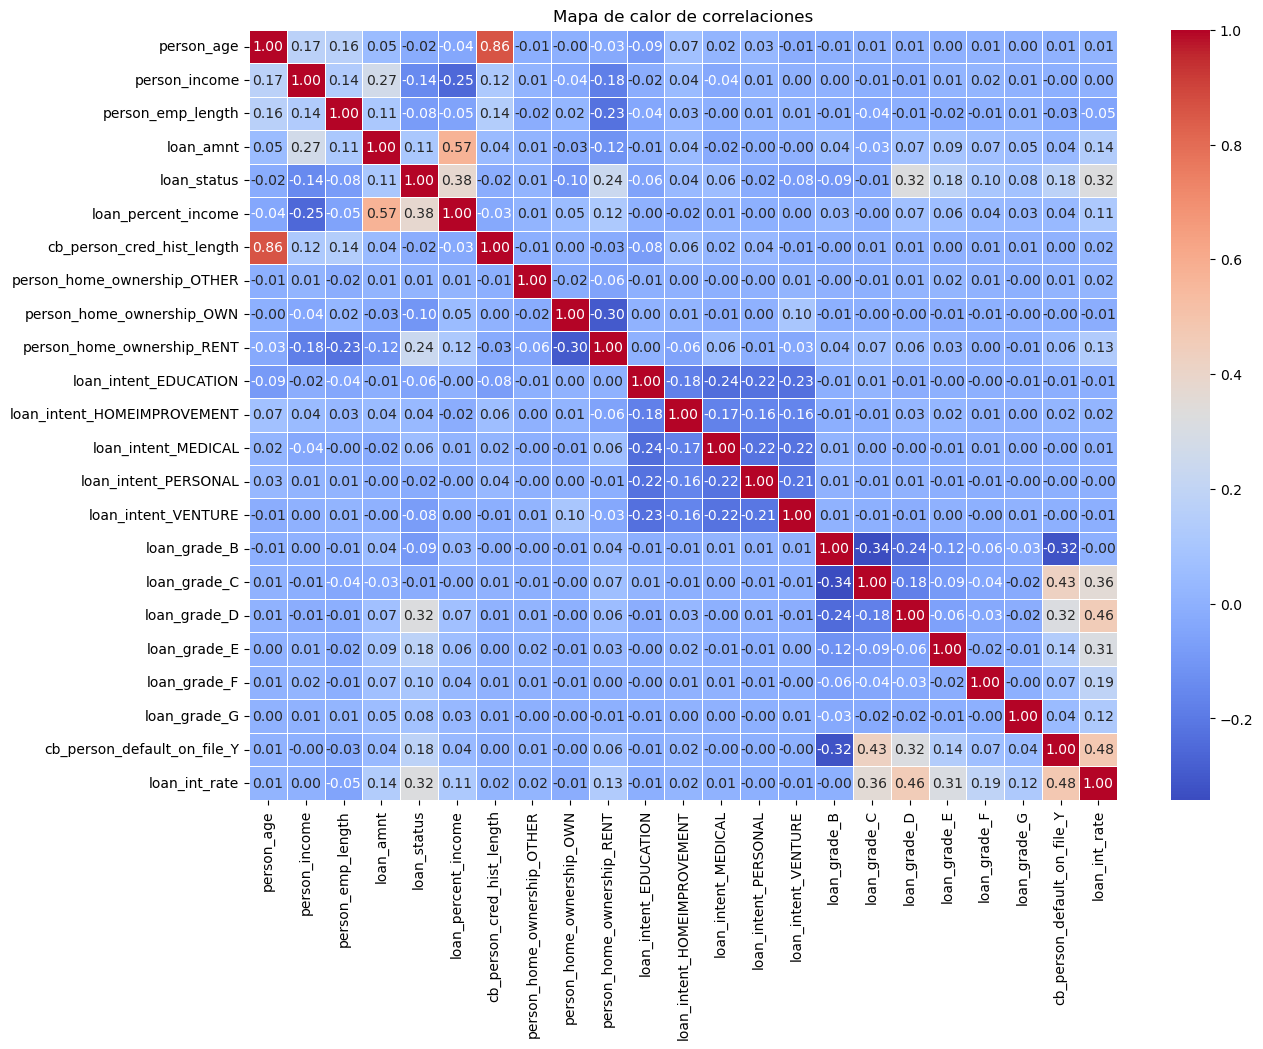

In [31]:
# Calcular la matriz de correlación
correlacion = df_final.corr()

# Crear el mapa de calor con Seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

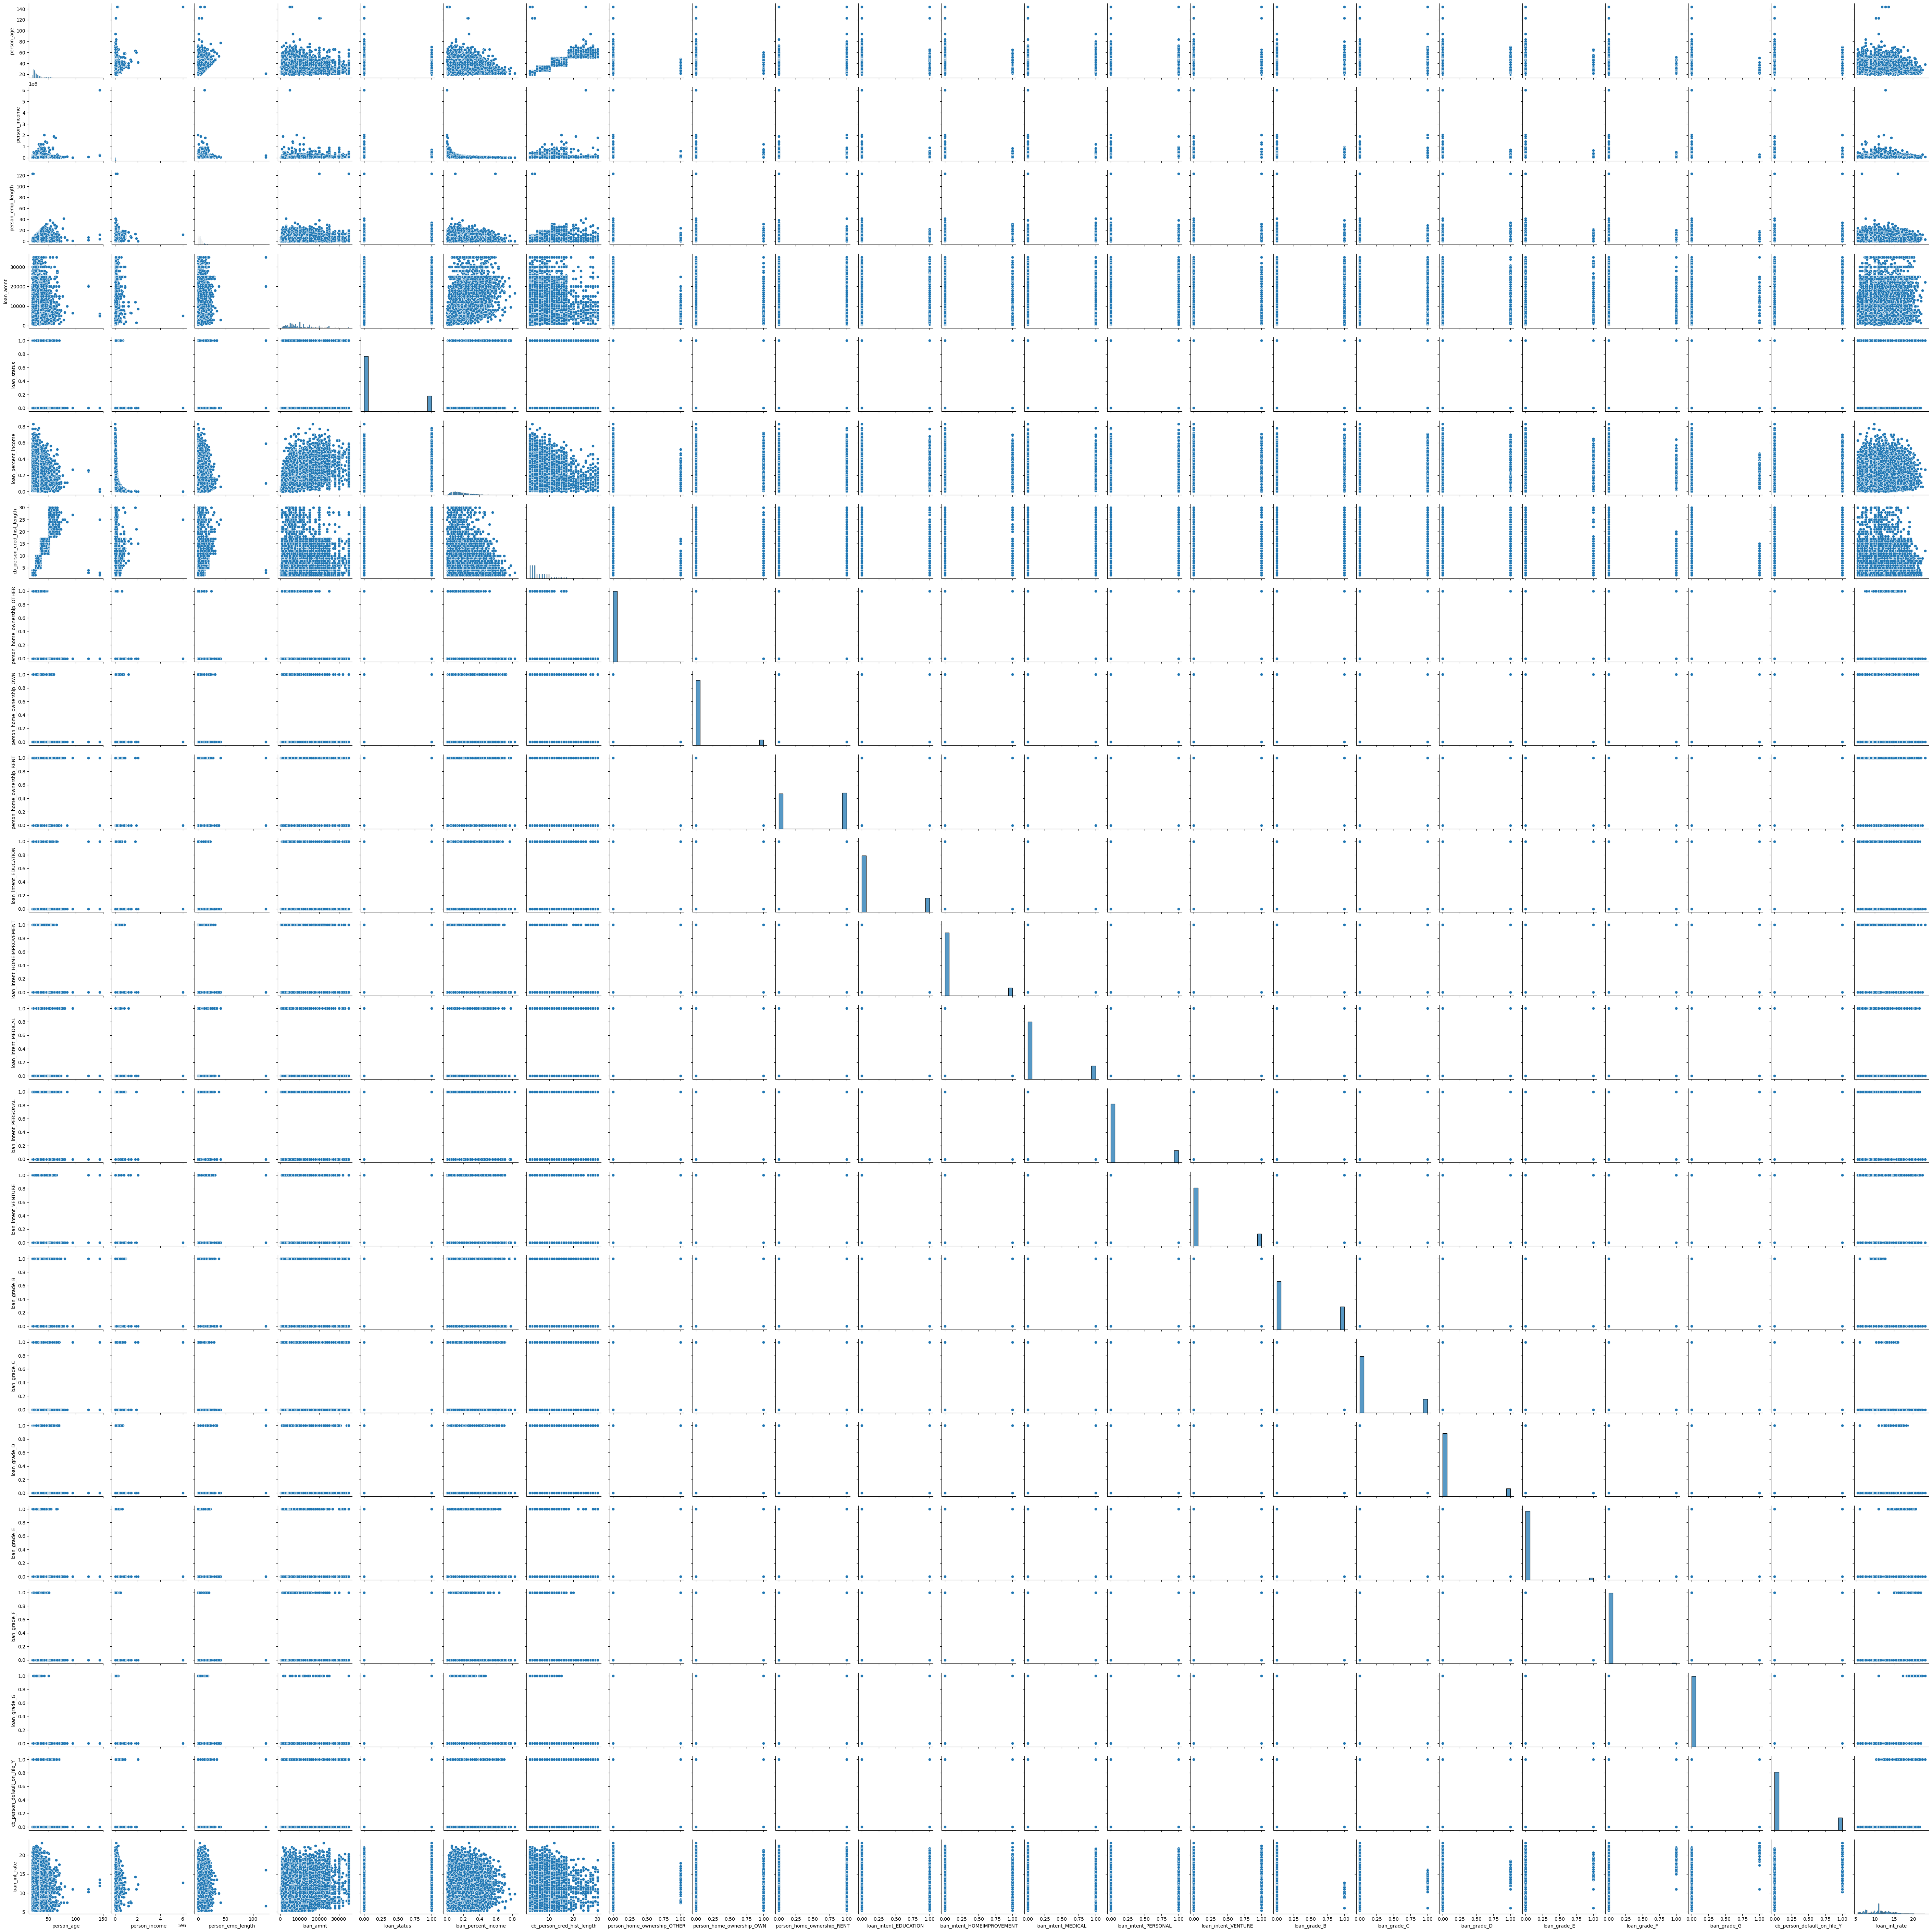

In [32]:
# Crear gráficos de dispersión entre todas las variables numéricas
sns.pairplot(df_final)

# Mostrar el gráfico
plt.show()

In [33]:
#entrenar al modelo
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)
y_pred

array([10.83430899, 13.36767587, 14.88468798, ...,  7.65933389,
       11.06095392, 15.20315184])

In [43]:
#r2 ajustado
n, p = X_test.shape  # Número de observaciones y predictores
r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"R² Ajustado: {r2_adjusted:.4f}")


R² Ajustado: 0.8220


In [44]:
#r2 normal
# Calcular R cuadrado y R cuadrado ajustado
r2 = r2_score(y_test, y_pred)
n, p = X_test.shape  # Número de observaciones y número de predictores


print(f"R²: {r2:.4f}")


R²: 0.8224


El R cuadrado ajustado indica qué tan bien explica la variabilidad de y

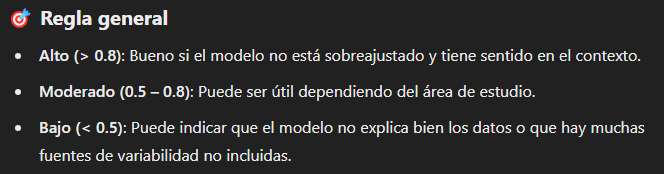

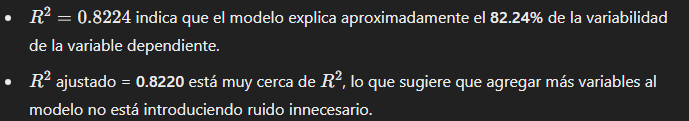

Lo que podemos hacer ahora es utilizar el método de eliminación hacia atrás para ver la importancia de las características y cómo influyen en R cuadrada ajustada, Pero en vez de ello utilizaremos una regresión regularizada para que haga este proceso automáticamente.

In [50]:
from sklearn.linear_model import Lasso

# Lista de valores de alpha a probar
alpha_values = [0.0000001, 0.001, 0.01,0.5, 1.0, 10.0, 20.0, 50.0]
scores = []

# Iteramos sobre cada valor de alpha
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)  # Creamos el modelo Lasso con el valor de alpha
    lasso.fit(X_train, y_train)  # Entrenamos el modelo
    score = lasso.score(X_test, y_test)  # Evaluamos el desempeño en el conjunto de prueba
    scores.append(score)  # Almacenamos el puntaje

# Imprimimos los resultados
print("Puntajes R^2 para diferentes valores de alpha:", scores)


Puntajes R^2 para diferentes valores de alpha: [0.8224383781233061, 0.8224922974575555, 0.8224720565259678, 0.5071240210068354, 0.16890281454735445, -8.266029628778426e-05, -8.266029628778426e-05, -8.266029628778426e-05]


Vemos que la máxima precisión que puede tener el modelo es de 0.82 Ya que para los 3 coeficientes el valor de R cuadrada ajustada no cambia. 

## 6.2.- Clasificación con árboles de decision